Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 018
Code Title: | Emerging Technologies in CpE 1 - Fundamentals of Computer Vision
1st Semester | AY 2023-2024
<hr> | <hr>
<u>**ACTIVITY NO.** | **Activity 7. Performing Face Recognition**
**Name** | Cabacungan, John Martin C.
**Section** | CPE32S3
**Date Performed**: | 21/02/2025
**Date Submitted**: | 21/02/2025
**Instructor**: |  Engr. Roman M. Richard

<hr>

## 1. Objectives

This activity aims to enable students to perform data preparation and face recognition on their own generated dataset.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Utilize data preparation techniques for images.
* Perform Face Recognition using multiple algorithms.
* Evaluate the performance of different algorithms.

## 3. Procedures and Outputs

### Preparing the training data

Now that we have our data, we need to load these sample pictures into our face recognition algorithms. All face recognition algorithms take two parameters in their `train()` method: an array of images and an array of labels. What do these labels represent? They are the IDs of a certain individual/face so that when face recognition is performed, we not only know the person was recognized but also who—among the many people available in our database—the person is.

To do that, we need to create a comma-separated value (CSV) file, which will contain the path to a sample picture followed by the ID of that person.

**Include a Screenshot of Your Dataset Here**

---

### Loading the data and recognizing faces

Next up, we need to load these two resources (the array of images and CSV file) into the face recognition algorithm, so it can be trained to recognize our face. To do this, we build a function that reads the CSV file and—for each line of the file—loads the image at the corresponding path into the images array and the ID into the labels array.

In [ ]:
import numpy as np
import os
import errno
import sys
import cv2

def read_images(dataset, sz=None):
  c = 0
  X, y = [], []

  for dirname, dirnames, filenames in os.walk(dataset):
    for subdirname in dirnames:
      subject_path = os.path.join(dirname, subdirname)
      for filename in os.listdir(subject_path):
        try:
          if(filename == ".directory"):
            continue
          filepath = os.path.join(subject_path, filename)
          im = cv2.imread(os.path.join(subject_path, filename), cv2.IMREAD_GRAYSCALE)

          # Resize the images to the prescribed size
          if (sz is not None):
            im = cv2.resize(im, (200,200))

          X.append(np.asarray(im, dtype=np.uint8))
          y.append(c)

        except IOError as e:
          print(f"I/O Error({e.errno}): {e.strerror}")
        except:
          print("Unexpected error:", sys.exc_info()[0])
          raise
      c = c+1
  return [X, y]

In [ ]:
test_data = read_images("dataset")
print(test_data)

[[array([[ 57,  55,  53, ..., 104, 105, 105],
       [ 57,  54,  52, ..., 104, 103, 103],
       [ 57,  54,  51, ..., 105, 104, 103],
       ...,
       [132, 129, 127, ...,  79,  80,  79],
       [135, 132, 129, ...,  81,  81,  79],
       [137, 134, 132, ...,  83,  82,  80]], dtype=uint8), array([[150, 150, 150, ..., 140, 141, 142],
       [150, 150, 149, ..., 139, 139, 140],
       [151, 151, 150, ..., 138, 138, 139],
       ...,
       [ 45,  46,  46, ..., 121, 120, 120],
       [ 47,  47,  47, ..., 122, 121, 121],
       [ 50,  48,  47, ..., 123, 122, 122]], dtype=uint8), array([[128, 129, 129, ..., 110, 113, 114],
       [129, 130, 131, ..., 112, 115, 117],
       [129, 131, 132, ..., 116, 118, 120],
       ...,
       [139, 137, 136, ..., 135, 133, 133],
       [142, 141, 141, ..., 135, 134, 135],
       [144, 143, 143, ..., 134, 134, 136]], dtype=uint8), array([[ 99, 104, 108, ..., 131, 130, 129],
       [103, 106, 109, ..., 131, 130, 130],
       [105, 107, 108, ..., 130, 130,

**Question: Run the function above on your generated dataset. Provide an analysis and note all the challenges you have encountered running this code.**

Images are loaded, converted, and resized from a directory using the `read_images` function, which also identifies them according to directories. It includes picture dimensions in `X` and a one-dimensional label array in `y`. It returns `X` with processed images and `y` with associated labels.

---

### Performing Face Recognition Algorithms

Here is a sample script for testing the Face Recognition Algorithm. In this section, we're going to follow the same process but with different algorithms for face recognitions, namely:
- Eigenface Recognition
- Fisherface Recognition
- Local Binary Pattern Histograms (LBPH) Recognition

In [ ]:
def face_rec():
    names = ['Friend1', 'Friend2']  # Put your names here for faces to recognize

    [X, y] = read_images("dataset", sz=(200, 200))
    y = np.asarray(y, dtype=np.int32)

    model = cv2.face.LBPHFaceRecognizer_create()
    model.train(X, y)

    camera = cv2.VideoCapture(0)
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

    while True:
        ret, img = camera.read()
        if not ret:
            break

        faces = face_cascade.detectMultiScale(img, 1.3, 5)

        for (x, y, w, h) in faces:
            gray = cv2.cvtColor(img[y:y + h, x:x + w], cv2.COLOR_BGR2GRAY)
            roi = cv2.resize(gray, (200, 200), interpolation=cv2.INTER_LINEAR)

            try:
                params = model.predict(roi)
                label = names[params[0]]
                color = (255, 0, 0)  # Default color (blue)

                if label == 'Friend2':
                    color = (0, 255, 0)  # Green color for Friend2

                cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
                cv2.putText(img, label + ", " + str(params[1]), (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
            except:
                continue

        cv2.imshow("camera", img)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    camera.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    face_rec()

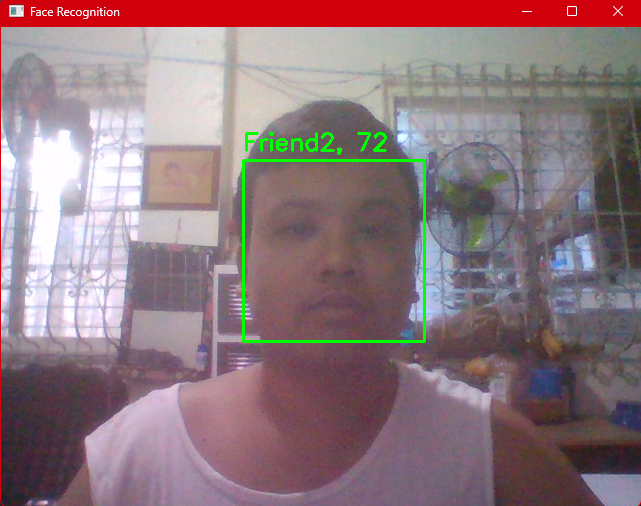

**Question: Provide an analysis of the sample script for the process using the Eigenface Model. What is the sample code doing? Are you able to troubleshoot any problems encountered?**

The sample code is using the eigenface model. It's same structure as activity 6 where the addition of the training of a face classifier in the try except portion of the sample script of the model.

---
Perform the remaining face recognition techniques by using the same (or modified) process from the sample code:

- `model = cv2.face.createFisherFaceRecognizer()`
- `model = cv2.face.createLBPHFaceRecognizer()`

In [ ]:
import numpy as np
import os
import sys
import cv2

def read_images(dataset, sz=(200, 200)):
    X, y = [], []
    label = 0

    for dirname, dirnames, _ in os.walk(dataset):
        for subdirname in dirnames:
            subject_path = os.path.join(dirname, subdirname)
            for filename in os.listdir(subject_path):
                try:
                    if filename == ".directory":
                        continue
                    filepath = os.path.join(subject_path, filename)
                    im = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)

                    if im is None:
                        print(f"Skipping unreadable file: {filepath}")
                        continue

                    if sz:
                        im = cv2.resize(im, sz)

                    X.append(np.asarray(im, dtype=np.uint8))
                    y.append(label)

                except Exception as e:
                    print(f"Error processing {filename}: {e}")

            label += 1
    return [X, y]

def face_rec():
    names = ['friend1', 'friend2']  # Adjust based on your dataset

    [X, y] = read_images("dataset", sz=(200, 200))
    y = np.asarray(y, dtype=np.int32)

    try:
        model = cv2.face.FisherFaceRecognizer_create()
        model.train(X, y)
    except AttributeError:
        print("Error: FisherFaceRecognizer not found. Install OpenCV-contrib.")
        return

    camera = cv2.VideoCapture(0)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    if face_cascade.empty():
        print("Error: Haar cascade file not found.")
        return

    while True:
        ret, img = camera.read()
        if not ret:
            break

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)

        for (x, y, w, h) in faces:
            face_roi = cv2.resize(gray[y:y + h, x:x + w], (200, 200), interpolation=cv2.INTER_LINEAR)

            try:
                label_id, confidence = model.predict(face_roi)
                label = names[label_id] if label_id < len(names) else "Unknown"
                color = (0, 255, 0) if label == 'friend2' else (255, 0, 0)

                cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
                cv2.putText(img, f"{label}, {int(confidence)}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)
            except Exception as e:
                print(f"Recognition error: {e}")

        cv2.imshow("Face Recognition", img)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    camera.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    face_rec()


# FisherFace Recognition Output

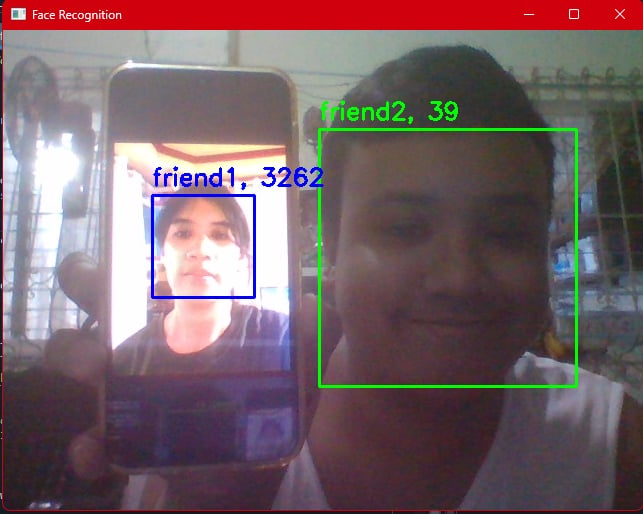

In [ ]:
import numpy as np
import os
import sys
import cv2

def read_images(dataset, sz=(200, 200)):
    X, y = [], []
    label = 0

    for dirname, dirnames, _ in os.walk(dataset):
        for subdirname in dirnames:
            subject_path = os.path.join(dirname, subdirname)
            for filename in os.listdir(subject_path):
                try:
                    if filename == ".directory":
                        continue
                    filepath = os.path.join(subject_path, filename)
                    im = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)

                    if im is None:
                        print(f"Skipping unreadable file: {filepath}")
                        continue

                    if sz:
                        im = cv2.resize(im, sz)

                    X.append(np.asarray(im, dtype=np.uint8))
                    y.append(label)

                except Exception as e:
                    print(f"Error processing {filename}: {e}")

            label += 1
    return [X, y]

def face_rec():
    names = ['friend1', 'friend2']  # Adjust based on your dataset

    [X, y] = read_images("dataset", sz=(200, 200))
    y = np.asarray(y, dtype=np.int32)

    try:
        model = cv2.face.EigenFaceRecognizer_create()
        model.train(X, y)
    except AttributeError:
        print("Error: EigenFaceRecognizer not found. Install OpenCV-contrib.")
        return

    camera = cv2.VideoCapture(0)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    if face_cascade.empty():
        print("Error: Haar cascade file not found.")
        return

    while True:
        ret, img = camera.read()
        if not ret:
            break

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)

        for (x, y, w, h) in faces:
            face_roi = cv2.resize(gray[y:y + h, x:x + w], (200, 200), interpolation=cv2.INTER_LINEAR)

            try:
                label_id, confidence = model.predict(face_roi)
                label = names[label_id] if label_id < len(names) else "Unknown"
                color = (0, 255, 0) if label == 'friend2' else (255, 0, 0)

                cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
                cv2.putText(img, f"{label}, {int(confidence)}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)
            except Exception as e:
                print(f"Recognition error: {e}")

        cv2.imshow("Face Recognition", img)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    camera.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    face_rec()

# EigenFace Recognition output

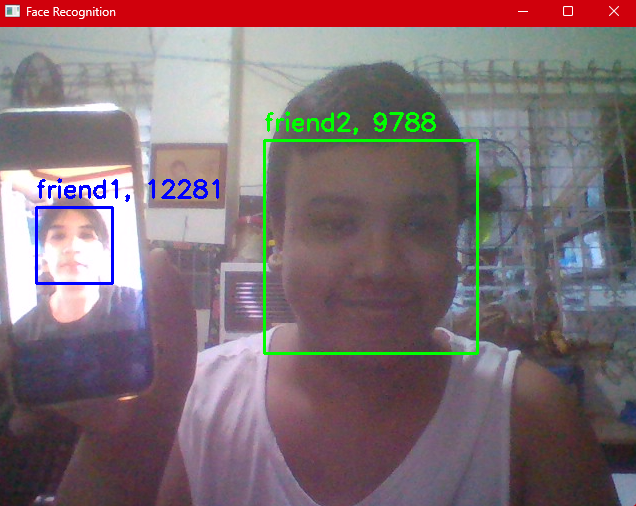

**Question: The `predict()` method returns a two-element array. Provide your analysis of the two returned values and their important ince this application.**

## 4. Supplementary Activity

Your accomplisment of the tasks below contribute to the achievement of ILO1, ILO2, and ILO3 for this module.

---

Tasks:
1. Create a new dataset for testing, this dataset must include the following:
  - The same person/s that the model has to recognize.
  - Different person/s that the model should not recognize.
2. For each model, perform 20 tests. Document the testing performed and provide observations.
3. Conclude on the performed tests by providing your evaluation of the performance of the models.

In [38]:
import cv2
import numpy as np
import os

def load_dataset(dataset, img_size=(200, 200)):
    images, labels = [], []
    label_map = {}
    label_counter = 0

    for subdir in os.listdir(dataset):
        subject_path = os.path.join(dataset, subdir)
        if not os.path.isdir(subject_path):
            continue

        if subdir not in label_map:
            label_map[subdir] = label_counter
            label_counter += 1

        for filename in os.listdir(subject_path):
            filepath = os.path.join(subject_path, filename)
            img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)

            if img is None:
                print(f"Skipping unreadable file: {filepath}")
                continue

            img = cv2.resize(img, img_size)
            images.append(img)
            labels.append(label_map[subdir])

    return np.array(images, dtype=np.uint8), np.array(labels, dtype=np.int32), label_map

def recognize_faces(model, dataset_path):
    names = ["Person1", "Person2"]

    images, labels, _ = load_dataset(dataset_path, img_size=(200, 200))
    model.train(images, labels)

    camera = cv2.VideoCapture(0)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    while True:
        ret, frame = camera.read()
        if not ret:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

        for (x, y, w, h) in faces:
            face_roi = cv2.resize(gray[y:y + h, x:x + w], (200, 200), interpolation=cv2.INTER_LINEAR)

            try:
                label_id, confidence = model.predict(face_roi)
                label = names[label_id] if label_id < len(names) else "Unknown"
                color = (255, 0, 0) if label == "Person2" else (0, 0, 255)

                text = "Acknowledged Person" if label == "Person2" else "Unidentified Person"
                cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
                cv2.putText(frame, text, (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
            except:
                continue

        cv2.imshow("Face Recognition", frame)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    camera.release()
    cv2.destroyAllWindows()


model1 = cv2.face.EigenFaceRecognizer_create()
model2 = cv2.face.FisherFaceRecognizer_create()
model3 = cv2.face.LBPHFaceRecognizer_create()

recognize_faces(model3, "dataset")

# EigenFace Recognition Output

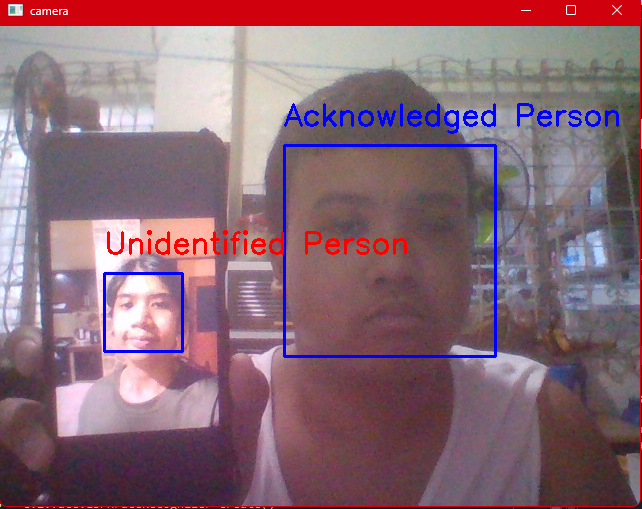

# FisherFace Recognition Output

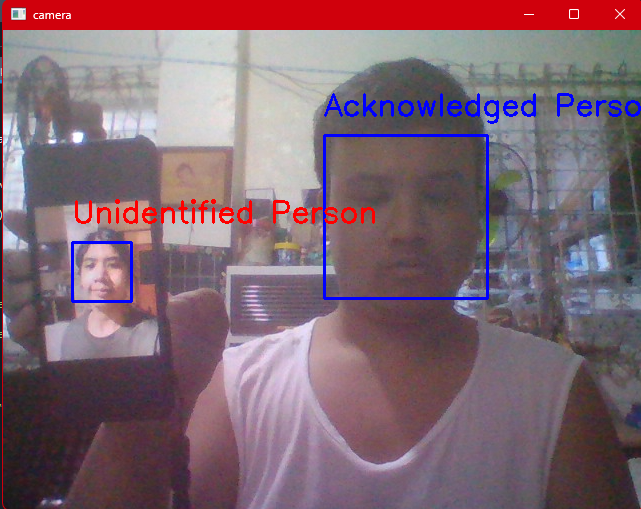

# LBPHFace Recognition output

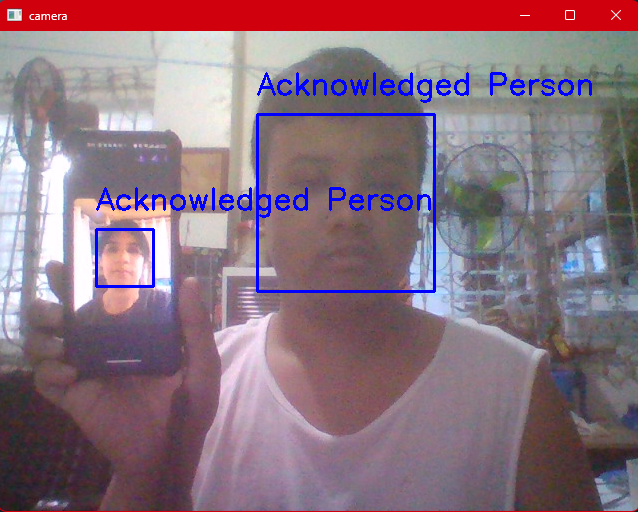

## 5. Summary, Conclusions and Lessons Learned

In this activity, we are utilizing the usage of facial detection with the help of LBPH Face Detection, FIsherFace Detection, and EigenFace Detection. What i think of the fastest, accurate facial tracking in terms of those I think that FisherFaces Recognition is more optimized/optimal algorithm.

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*